Magnetic tile defect detection model

Installing and importing python libraries to load and create CNN model

In [12]:
!pip install tensorflow
!pip instal jax jaxlib
!pip install --upgrade jax jaxlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

ERROR: unknown command "instal" - maybe you meant "install"



Checking GPU

In [13]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("GPU device not found.")

GPU device not found.


In [14]:
# Define image dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

Loading images class-wise or category wise

In [15]:
# Define the number of classes
NUM_CLASSES = 6  # Assuming there are 6 categories (adjust if needed)

# Define the path to the data directory
data_dir = "Organized_Magnetic_Tile_Images"

# Define the categories and their corresponding paths
categories = {
    "Defective-Blowhole": os.path.join(data_dir, "MT_Blowhole", "GT"),
    "Defective-Break": os.path.join(data_dir, "MT_Break", "GT"),
    "Defective-Crack": os.path.join(data_dir, "MT_Crack", "GT"),
    "Defective-Fray": os.path.join(data_dir, "MT_Fray", "GT"),  # Assuming "MT_Fray" is a directory
    "Non-defective": os.path.join(data_dir, "MT_Free", "GT"),
    "Defective-Uneven": os.path.join(data_dir, "MT_Uneven", "GT")
}

# Create a dictionary to store the images and labels
data = {}

In [16]:
# Load images and labels for each category
category_index = 0  # Initialize a counter for category indices
for category, category_path in categories.items():
    images = []
    labels = []
    for filename in os.listdir(category_path):
        if filename.endswith((".jpg", ".png", ".jpeg")):  # Check for image files
            img_path = os.path.join(category_path, filename)
            img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
            img_array = image.img_to_array(img)
            images.append(img_array)
            labels.append(category_index)  # Assign the current category index

    # Convert labels to one-hot encoding
    labels = to_categorical(labels, num_classes=NUM_CLASSES)

    # Store images and labels in the dictionary
    data[category] = {"images": images, "labels": labels}

    category_index += 1  # Increment the category index for the next category

Combining all data

In [17]:
# Combine data from all categories
all_images = []
all_labels = []
for category in categories:
    all_images.extend(data[category]["images"])
    all_labels.extend(data[category]["labels"])

Pixel normalization and Train-test aplit

In [18]:
# Convert data to NumPy arrays
X = np.array(all_images)
y = np.array(all_labels)

# Normalize pixel values
X = X / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

Creating and defining CNN model

In [19]:
# Create the ResNet30 model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Dense layers
model.add(Dense(1024, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Trainning the model

epoch: 30
Learning rate: 0.0001
Loss: categorical cross-entropy
batch size: 32

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=32)  # Adjust epochs as needed

# Display accuracy and loss for each epoch
for epoch in range(30):  # Assuming you trained for 10 epochs
    print(f"Epoch {epoch+1}:")
    print(f"  Loss: {history.history['loss'][epoch]:.4f}")
    print(f"  Accuracy: {history.history['accuracy'][epoch]:.4f}")


Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6462 - loss: 1.2773
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7093 - loss: 1.1018
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6793 - loss: 1.1407
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.7172 - loss: 1.0491
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.7101 - loss: 1.0997
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7250 - loss: 1.0215
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7104 - loss: 1.0136
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7366 - loss: 0.9241
Epoch 9/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.7125 - loss: 0.9148
Epoch 10/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 218s 7s/step - accuracy: 0.7377 - loss: 0.8260
Epoch 11/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7429 - loss: 0.7629
Epoch 12/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7673 - l

Test the model

In [21]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.3111
Test Accuracy: 0.9368


In [22]:
# Save the model
model.save("resnet30_model.h5")

Testing model with different images 

In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model("resnet30_model.h5")  # Replace with your model filename

# Define the image path
image_path = "Organized_Magnetic_Tile_Images/MT_Blowhole/GT/MT_Blowhole_image_1.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))  # Use the same size as training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction[0])

# Define the categories
categories = ["Defective-Blowhole", "Defective-Break", "Defective-Crack", "Defective-Fray", "Non-defective", "Defective-Uneven"]

# Get the predicted category
predicted_category = categories[predicted_class_index]

# Print the prediction
print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Category: Defective-Blowhole


In [24]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model("resnet30_model.h5")  # Replace with your model filename

# Define the image path
image_path = "Organized_Magnetic_Tile_Images/MT_Crack/GT/MT_Crack_image_11.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))  # Use the same size as training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction[0])

# Define the categories
categories = ["Defective-Blowhole", "Defective-Break", "Defective-Crack", "Defective-Fray", "Non-defective", "Defective-Uneven"]

# Get the predicted category
predicted_category = categories[predicted_class_index]

# Print the prediction
print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Predicted Category: Defective-Crack


In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model("resnet30_model.h5")  # Replace with your model filename

# Define the image path
image_path = "Organized_Magnetic_Tile_Images/MT_Free/GT/MT_Free_image_102.jpg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))  # Use the same size as training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make the prediction
prediction = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(prediction[0])

# Define the categories
categories = ["Defective-Blowhole", "Defective-Break", "Defective-Crack", "Defective-Fray", "Non-defective", "Defective-Uneven"]

# Get the predicted category
predicted_category = categories[predicted_class_index]

# Print the prediction
print(f"Predicted Category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicted Category: Non-defective


Graph of accuracy and loss in each epoch

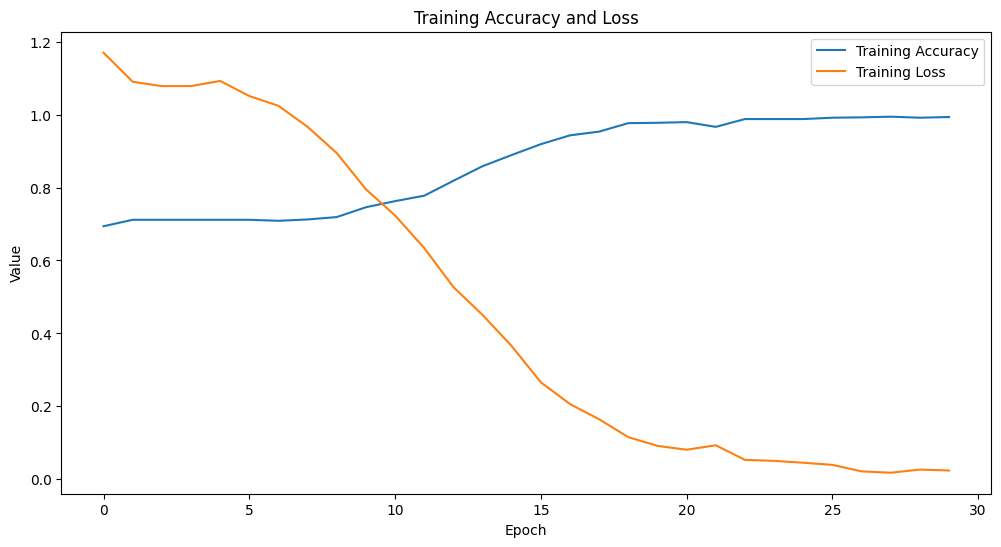

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'history' is the variable returned by model.fit()
# and 'X_test', 'y_test', 'categories' are already defined


import matplotlib.pyplot as plt

# Assuming 'history' is the variable returned by model.fit()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Confusion Matrix

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step


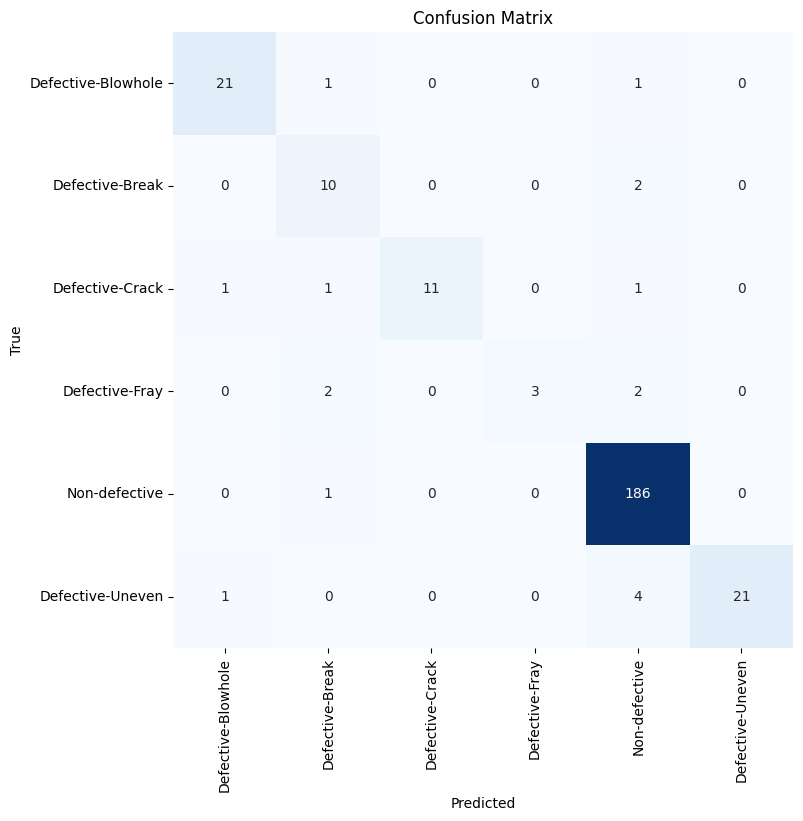

In [27]:
# Predictions for confusion matrix (assuming you have X_test and y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Graphs of Test accuracy and loss

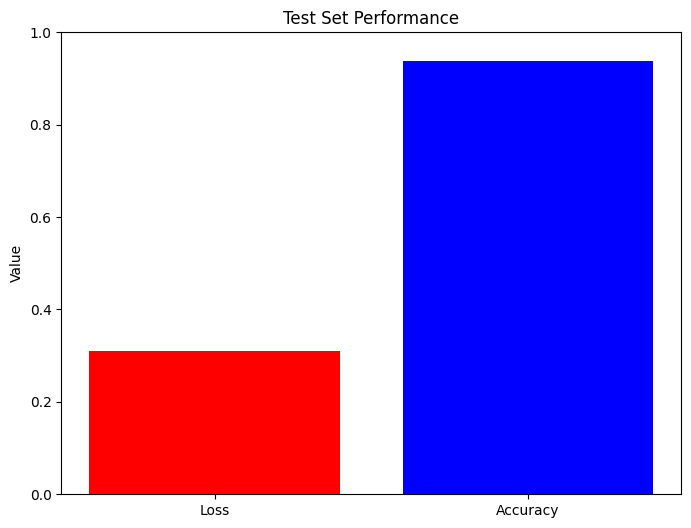

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Create a bar graph
metrics = ['Loss', 'Accuracy']
values = [loss, accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'blue'])
plt.title('Test Set Performance')
plt.ylabel('Value')
plt.ylim([0, 1])  # Set y-axis limits for better visualization (optional)
plt.show()


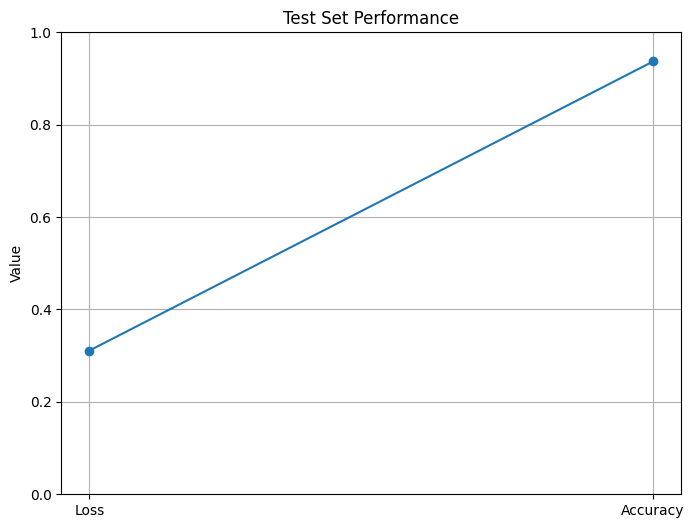

In [33]:

plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', linestyle='-')  # Use plot() for line graph
plt.title('Test Set Performance')
plt.ylabel('Value')
plt.ylim([0, 1])  # Optional: Set y-axis limits
plt.grid(True)    # Optional: Add grid lines
plt.show()

Model description

In [36]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      18,875,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,450,120 (78.01 MB)

 Trainable params: 20,450,118 (78.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
 from sklearn.metrics import classification_report
categories = ["Defective-Blowhole", "Defective-Break", "Defective-Crack", "Defective-Fray", "Non-defective", "Defective-Uneven"]
 print(classification_report(y_true_classes, y_pred_classes, target_names=categories))

                    precision    recall  f1-score   support

Defective-Blowhole       0.91      0.91      0.91        23
   Defective-Break       0.67      0.83      0.74        12
   Defective-Crack       1.00      0.79      0.88        14
    Defective-Fray       1.00      0.43      0.60         7
     Non-defective       0.95      0.99      0.97       187
  Defective-Uneven       1.00      0.81      0.89        26

          accuracy                           0.94       269
         macro avg       0.92      0.79      0.83       269
      weighted avg       0.94      0.94      0.93       269

